### The Controller Function, Actuators and Sensors

In [1]:
import distutils.util as distutils
import os
import mujoco
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media

all_variables = dir()
for name in all_variables:
    
    # Print the item if it doesn't start with '__'
    if not name.startswith('__'):
        if name == 'renderer':
            del renderer
        elif name == 'xml':
            del xml
        elif name == 'model':
            del model
        elif name == 'data':
            del data

In [2]:
def init_controller(model,data):
    #initialize the controller here. This function is called once, in the beginning
    pass

def controller(model, data):
    #spring-like position servo
    # set_position_servo(1, 10)
    # data.ctrl[1] = np.pi  #position

    #speed control; velocity servo
    # set_velocity_servo(2,100)
    # data.ctrl[2] = 0.5  #velocity

    #position control; position/velocity servo
    # set_position_servo(1, 100)
    # set_velocity_servo(2,10)
    # data.ctrl[1] = np.pi #position

    #torque control;
    set_torque_servo(0, 1)
    # data.ctrl[0] = -10*(data.qpos[0]-np.pi)  #torque (spring)
    # data.ctrl[0] = -100*(data.qvel[0]-0.5) #speed control]
    data.ctrl[0] = -100*(data.qpos[0]-np.pi) -10*data.qvel[0] #position control

def set_torque_servo(actuator_no, flag):
    if (flag==0):
        model.actuator_gainprm[actuator_no, 0] = 0
    else:
        model.actuator_gainprm[actuator_no, 0] = 1

def set_position_servo(actuator_no, kp):
    model.actuator_gainprm[actuator_no, 0] = kp
    model.actuator_biasprm[actuator_no, 1] = -kp

def set_velocity_servo(actuator_no, kv):
    model.actuator_gainprm[actuator_no, 0] = kv
    model.actuator_biasprm[actuator_no, 2] = -kv

""

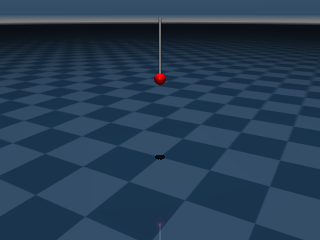

In [3]:
model = mujoco.MjModel.from_xml_path('model/2D_simple_pendulum.xml')
data = mujoco.MjData(model)
cam = mujoco.MjvCamera()

renderer = None
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

In [4]:
data.qpos[0] = np.pi/2
#initialize the controller
init_controller(model,data)

#set the controller
mujoco.set_mjcb_control(controller)

In [5]:
# Parameters.
DURATION = 5          # seconds
FRAMERATE = 60        # Hz

# Reset data, set initial pose.
mujoco.mj_resetData(model, data)

# Allocate position difference dq.
dq = np.zeros(model.nv)

frames = []
while data.time < DURATION:

  # Step the simulation.
  mujoco.mj_step(model, data)

  # Render and save frames.
  if len(frames) < data.time * FRAMERATE:
    renderer.update_scene(data, 'track')
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=FRAMERATE)

In [2]:
all_variables = dir()
for name in all_variables:
    
    # Print the item if it doesn't start with '__'
    if not name.startswith('__'):
        if name == 'renderer':
            del renderer
        elif name == 'xml':
            del xml
        elif name == 'model':
            del model
        elif name == 'data':
            del data

In [3]:
def controller(model, data):
    """
    This function implements a PD controller

    Since there are no gravity compensation,
    it will not be very accurate at tracking
    the set point. It will be accurate if
    gravity is turned off.
    """
    if actuator_type == "torque":
        model.actuator_gainprm[0, 0] = 1
        data.ctrl[0] = -10 * \
            (data.sensordata[0] - 0.0) - \
            1 * (data.sensordata[1] - 0.0)
    elif actuator_type == "servo":
        kp = 10.0
        model.actuator_gainprm[1, 0] = kp
        model.actuator_biasprm[1, 1] = -kp
        data.ctrl[1] = -0.5

        kv = 1.0
        model.actuator_gainprm[2, 0] = kv
        model.actuator_biasprm[2, 2] = -kv
        data.ctrl[2] = 0.0

""

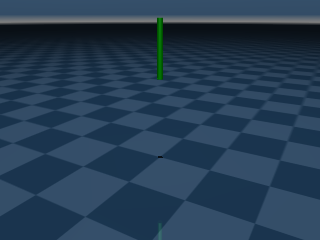

In [4]:
xml_path = "model/simple_pendulum.xml"
model = mujoco.MjModel.from_xml_path(xml_path)  # MuJoCo model
data = mujoco.MjData(model)                # MuJoCo data
cam = mujoco.MjvCamera()                        # Abstract camera
opt = mujoco.MjvOption()                        # visualization options
mujoco.mjv_defaultCamera(cam)
mujoco.mjv_defaultOption(opt)

# Set camera configuration
cam.azimuth = 90.0
cam.distance = 5.0
cam.elevation = -5
cam.lookat = np.array([0.012768, -0.000000, 1.254336])


#set the controller
actuator_type = "torque"
mujoco.set_mjcb_control(controller)



renderer = None
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())